<a href="https://colab.research.google.com/github/PerezTorresJhoyceR/IAParcial/blob/main/2dparcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/IA/diabetes_012_health_indicators_BRFSS2015.csv")
print("Tamaño del dataset:", df.shape)

Tamaño del dataset: (253680, 22)


In [5]:
# Eliminar la primera columna (etiquetas de diabetes)
X = df.iloc[:, 1:].copy()  # Eliminar primera columna
print(f"Dimensiones después de eliminar etiquetas: {X.shape}")
print(f"Primeras 5 filas:")
print(X.head())

Dimensiones después de eliminar etiquetas: (253680, 21)
Primeras 5 filas:
   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           0.0     0.0      1.0  ...            1.0          0.0      5.0   
1           1.0     0.0      0.0  ...            0.0          1.0      3.0   
2           0.0     1.0      0.0  ...            1.0          1.0      5.0   
3           1.0     1.0      1.0  ...            1.0          0.0      2.0   
4           1.0     1.0      1.0  ...            1.0          0.0  

In [8]:
# Información básica del dataset
print(f"\nInformación del dataset:")
print(X.info())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              2536


=== ANÁLISIS EXPLORATORIO ===


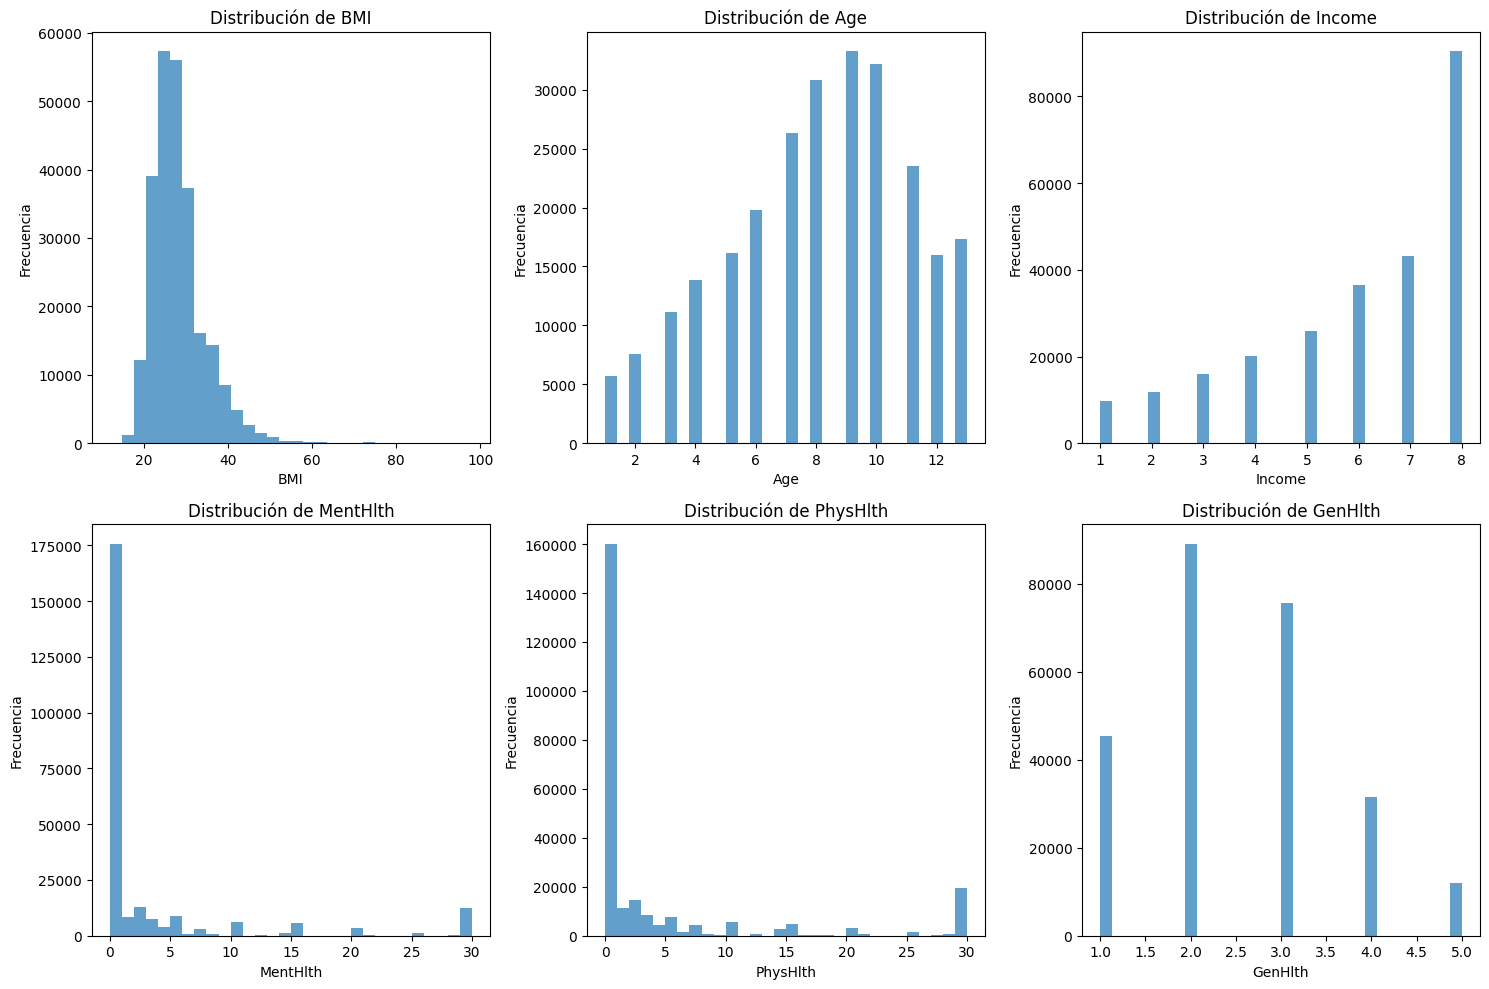

In [16]:
# 2. ANÁLISIS EXPLORATORIO DE DATOS
print("\n=== ANÁLISIS EXPLORATORIO ===")

# Función para visualizar clusters (adaptada de tu código base)
def plot_clusters(X_plot, y=None, title="Dispersión de Datos", figsize=(10, 6)):
    plt.figure(figsize=figsize)
    if y is not None:
        scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, s=1, alpha=0.6)
        plt.colorbar(scatter)
    else:
        plt.scatter(X_plot[:, 0], X_plot[:, 1], s=1, alpha=0.6)
    plt.xlabel("Componente Principal 1", fontsize=12)
    plt.ylabel("Componente Principal 2", fontsize=12, rotation=0)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()


# Distribución de algunas variables clave
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
variables_importantes = ['BMI', 'Age', 'Income', 'MentHlth', 'PhysHlth', 'GenHlth']

for i, var in enumerate(variables_importantes):
    row = i // 3
    col = i % 3
    if var in X.columns:
        axes[row, col].hist(X[var], bins=30, alpha=0.7)
        axes[row, col].set_title(f'Distribución de {var}')
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


=== PREPROCESAMIENTO PARA CLUSTERING ===
Varianza explicada por las 2 primeras componentes: 0.251


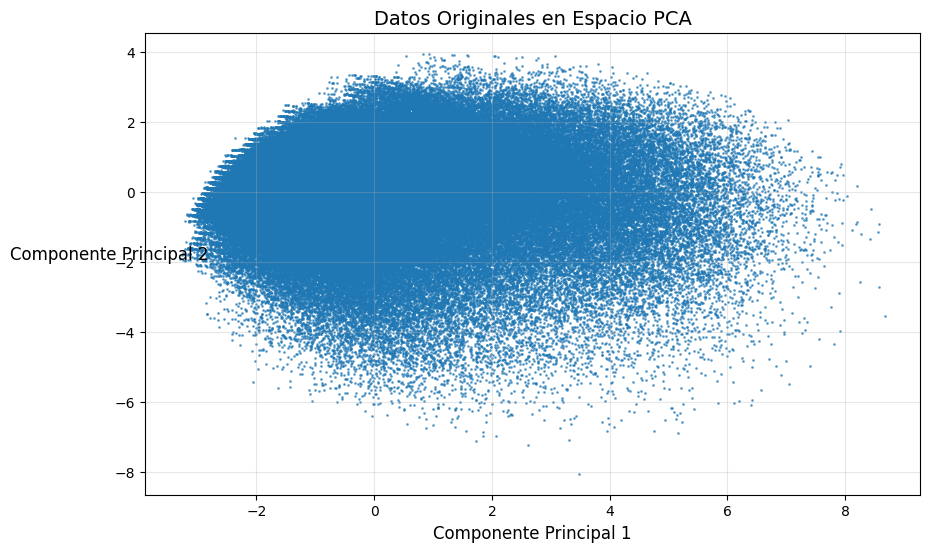

In [17]:

# 3. PREPROCESAMIENTO PARA CLUSTERING
print("\n=== PREPROCESAMIENTO PARA CLUSTERING ===")

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducción de dimensionalidad y visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Varianza explicada por las 2 primeras componentes: {pca.explained_variance_ratio_.sum():.3f}")

# Visualizar datos originales en espacio PCA
plot_clusters(X_pca, title="Datos Originales en Espacio PCA")



=== DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS ===


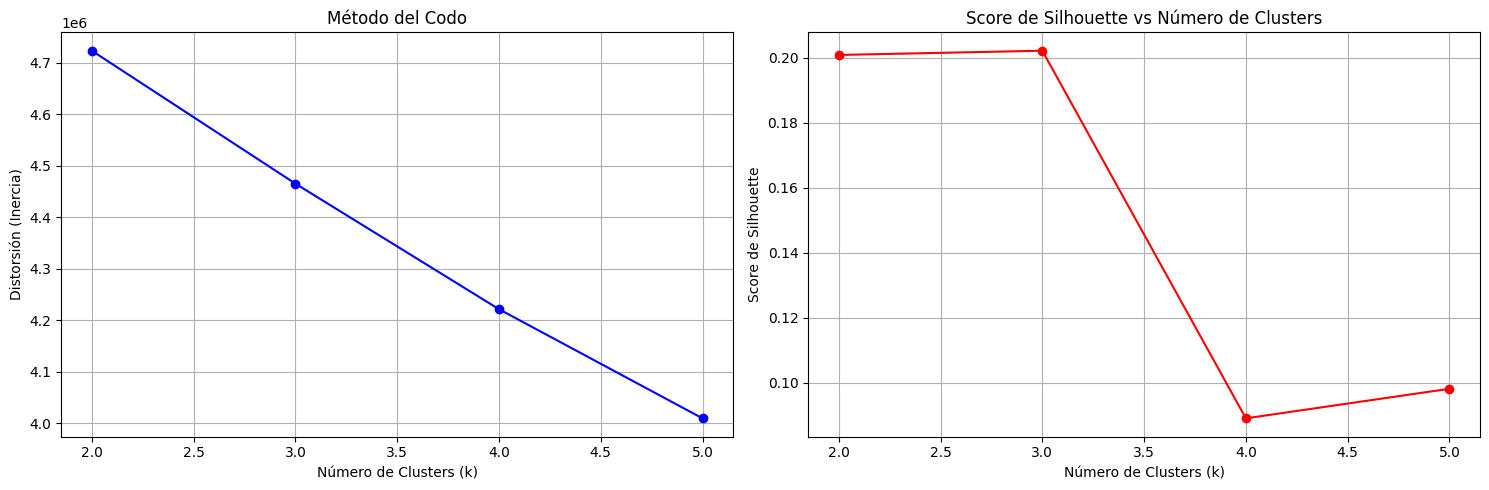

Número óptimo de clusters según Silhouette Score: 3


In [25]:
# 4. DETERMINAR NÚMERO ÓPTIMO DE CLUSTERS
print("\n=== DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS ===")

# Método del codo y Silhouette Score
K_range = range(2, 6)
distortions = []
silhouette_scores = []

from sklearn.model_selection import train_test_split
sample_size = int(0.1 * X_scaled.shape[0])

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

    X_sample, _, labels_sample, _ = train_test_split(
        X_scaled, kmeans.labels_, train_size=sample_size, stratify=kmeans.labels_, random_state=42
    )
    silhouette_scores.append(silhouette_score(X_sample, labels_sample))

# Gráfica del método del codo y Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, distortions, 'bo-')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Distorsión (Inercia)')
ax1.set_title('Método del Codo')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Score de Silhouette')
ax2.set_title('Score de Silhouette vs Número de Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

if silhouette_scores:
    k_optimo = K_range[np.argmax(silhouette_scores)]
    print(f"Número óptimo de clusters según Silhouette Score: {k_optimo}")
else:
    k_optimo = None
    print("No silhouette scores were calculated.")


In [26]:
# 5. APLICAR DIFERENTES ALGORITMOS DE CLUSTERING
print("\n=== APLICACIÓN DE ALGORITMOS DE CLUSTERING ===")

# K-Means
print("Aplicando K-Means...")
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)



=== APLICACIÓN DE ALGORITMOS DE CLUSTERING ===
Aplicando K-Means...



=== VISUALIZACIÓN DE RESULTADOS ===


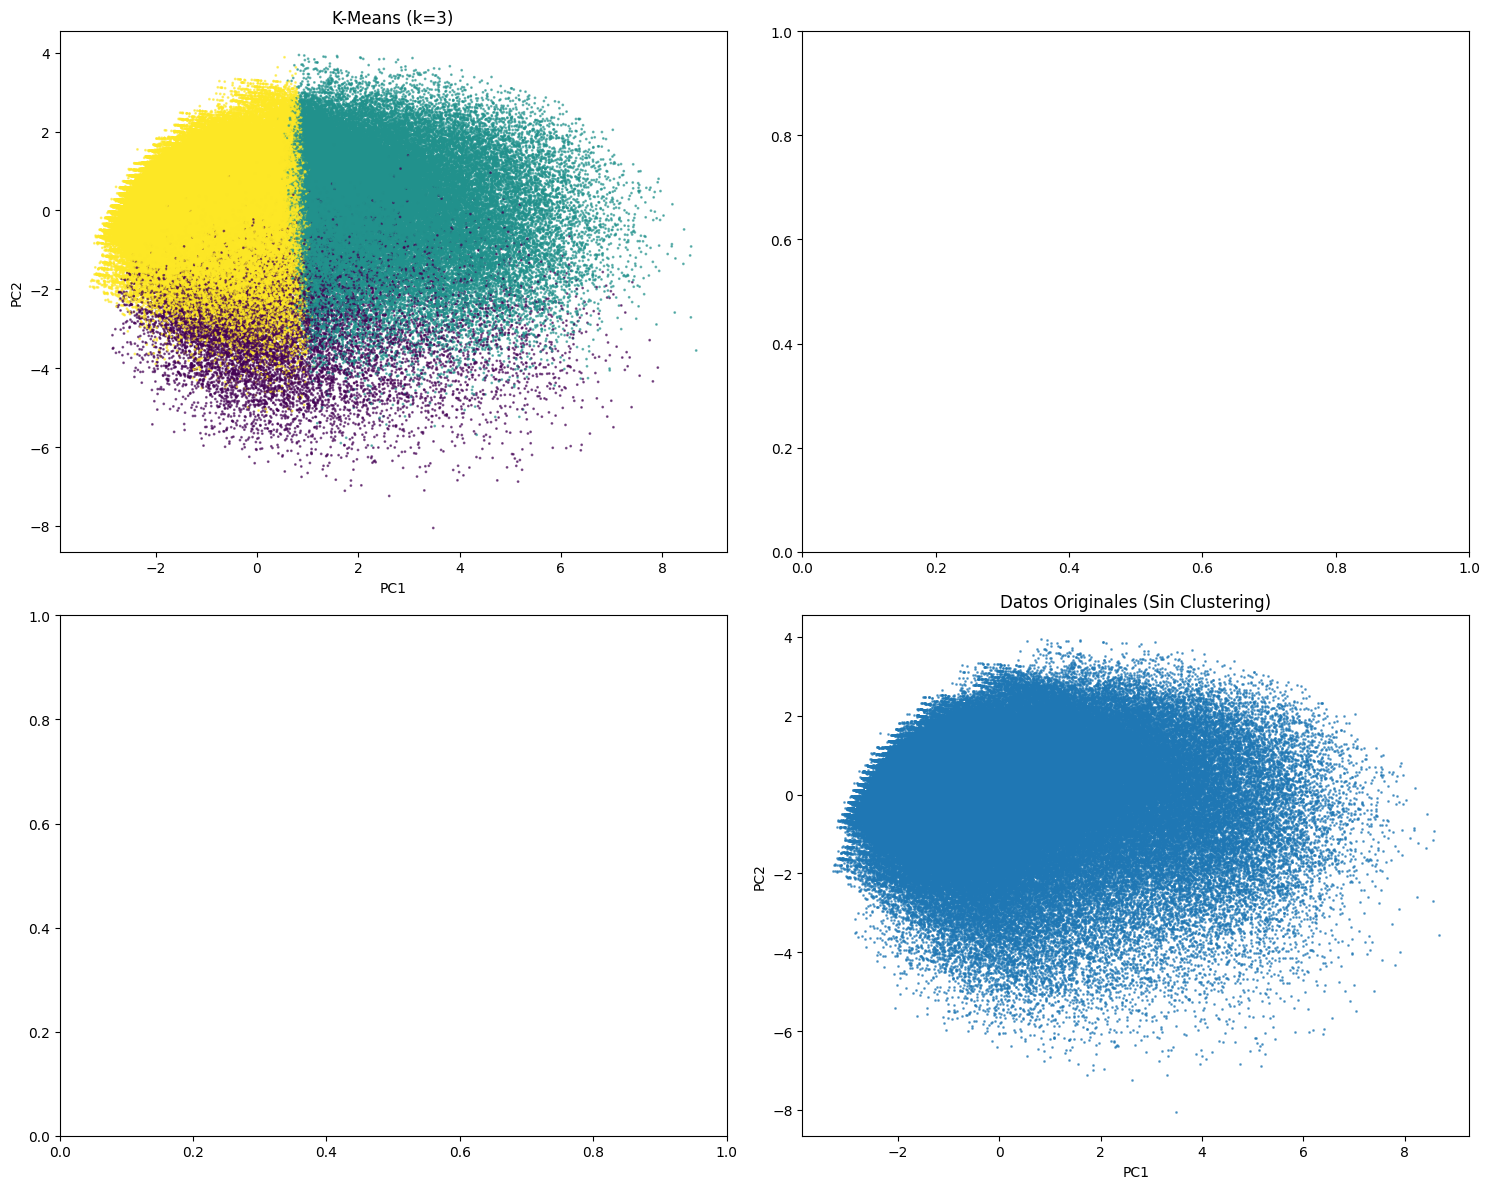

In [27]:
# 6. VISUALIZACIÓN DE RESULTADOS
print("\n=== VISUALIZACIÓN DE RESULTADOS ===")

# Crear subplots para comparar algoritmos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# K-Means
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, s=1, alpha=0.6)
axes[0, 0].set_title(f'K-Means (k={k_optimo})')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

# Datos originales sin clustering
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], s=1, alpha=0.6)
axes[1, 1].set_title('Datos Originales (Sin Clustering)')
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')

plt.tight_layout()
plt.show()


=== ANÁLISIS DETALLADO DE CLUSTERS (K-MEANS) ===
Tamaño de cada cluster:
Cluster
0     12369
1     63705
2    177606
Name: count, dtype: int64

Promedios por cluster:
               BMI       Age    Income  MentHlth   PhysHlth   GenHlth
Cluster                                                              
0        28.897486  6.158056  4.616461  4.871453   4.470450  2.695853
1        30.909505  9.497653  4.429542  7.025838  12.387756  3.594208
2        27.440036  7.636966  6.736608  1.689566   1.304427  2.110154

=== MÉTRICAS DE EVALUACIÓN ===

=== ANÁLISIS DE COMPONENTES PRINCIPALES ===


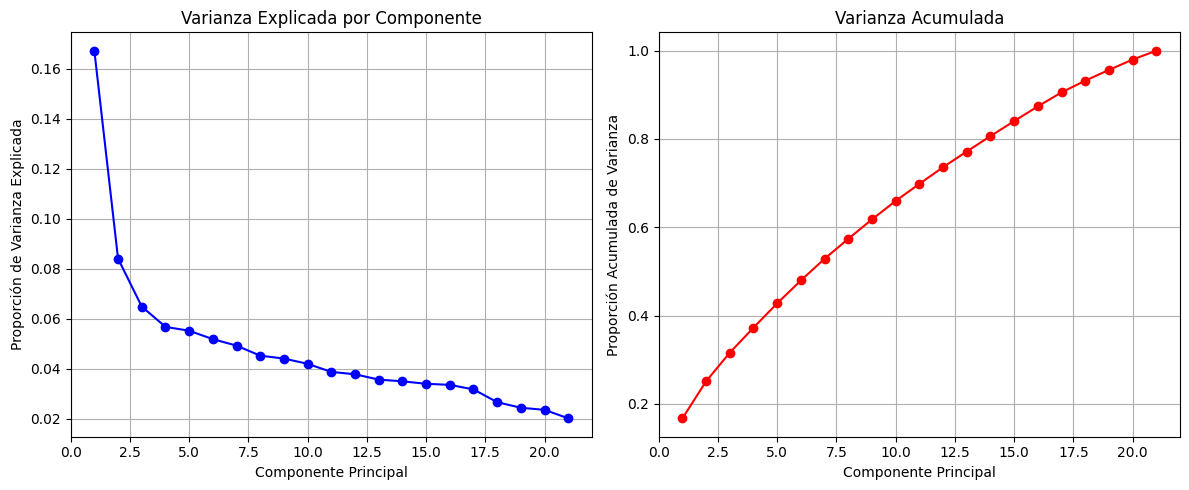

=== ANÁLISIS COMPLETADO ===
Se identificaron 3 clusters principales en los datos.
Revisa las visualizaciones para interpretar los patrones encontrados.


In [32]:

# 7. ANÁLISIS DE CLUSTERS (K-MEANS)
print("\n=== ANÁLISIS DETALLADO DE CLUSTERS (K-MEANS) ===")

# Agregar etiquetas de cluster al dataframe original
X_clustered = X.copy()
X_clustered['Cluster'] = kmeans_labels

# Estadísticas por cluster
print("Tamaño de cada cluster:")
print(X_clustered['Cluster'].value_counts().sort_index())

# Promedios por cluster para variables importantes
cluster_summary = X_clustered.groupby('Cluster')[variables_importantes].mean()
print("\nPromedios por cluster:")
print(cluster_summary)


# 9. PCA EXPLICATIVO
print("\n=== ANÁLISIS DE COMPONENTES PRINCIPALES ===")

# PCA con más componentes para análisis
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Varianza explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_, 'bo-')
plt.title('Varianza Explicada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         np.cumsum(pca_full.explained_variance_ratio_), 'ro-')
plt.title('Varianza Acumulada')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción Acumulada de Varianza')
plt.grid(True)

plt.tight_layout()
plt.show()

print("=== ANÁLISIS COMPLETADO ===")
print(f"Se identificaron {k_optimo} clusters principales en los datos.")
print("Revisa las visualizaciones para interpretar los patrones encontrados.")


=== K=2 ===
Cluster 0: Score=0.025
Cluster 1: Score=0.284
Silhouette Score Promedio General: 0.264

=== K=3 ===
Cluster 0: Score=0.029
Cluster 1: Score=0.225
Cluster 2: Score=0.215
Silhouette Score Promedio General: 0.211

=== K=4 ===
Cluster 0: Score=0.198
Cluster 1: Score=-0.023
Cluster 2: Score=0.213
Cluster 3: Score=0.279
Silhouette Score Promedio General: 0.203

=== K=5 ===
Cluster 0: Score=0.186
Cluster 1: Score=-0.015
Cluster 2: Score=0.207
Cluster 3: Score=0.179
Cluster 4: Score=0.029
Silhouette Score Promedio General: 0.102

=== K=6 ===
Cluster 0: Score=0.171
Cluster 1: Score=0.014
Cluster 2: Score=0.206
Cluster 3: Score=0.213
Cluster 4: Score=-0.017
Cluster 5: Score=-0.003
Silhouette Score Promedio General: 0.102

=== K=7 ===
Cluster 0: Score=0.172
Cluster 1: Score=0.040
Cluster 2: Score=0.182
Cluster 3: Score=0.220
Cluster 4: Score=-0.056
Cluster 5: Score=0.078
Cluster 6: Score=-0.008
Silhouette Score Promedio General: 0.094

=== K=8 ===
Cluster 0: Score=0.164
Cluster 1: Sc

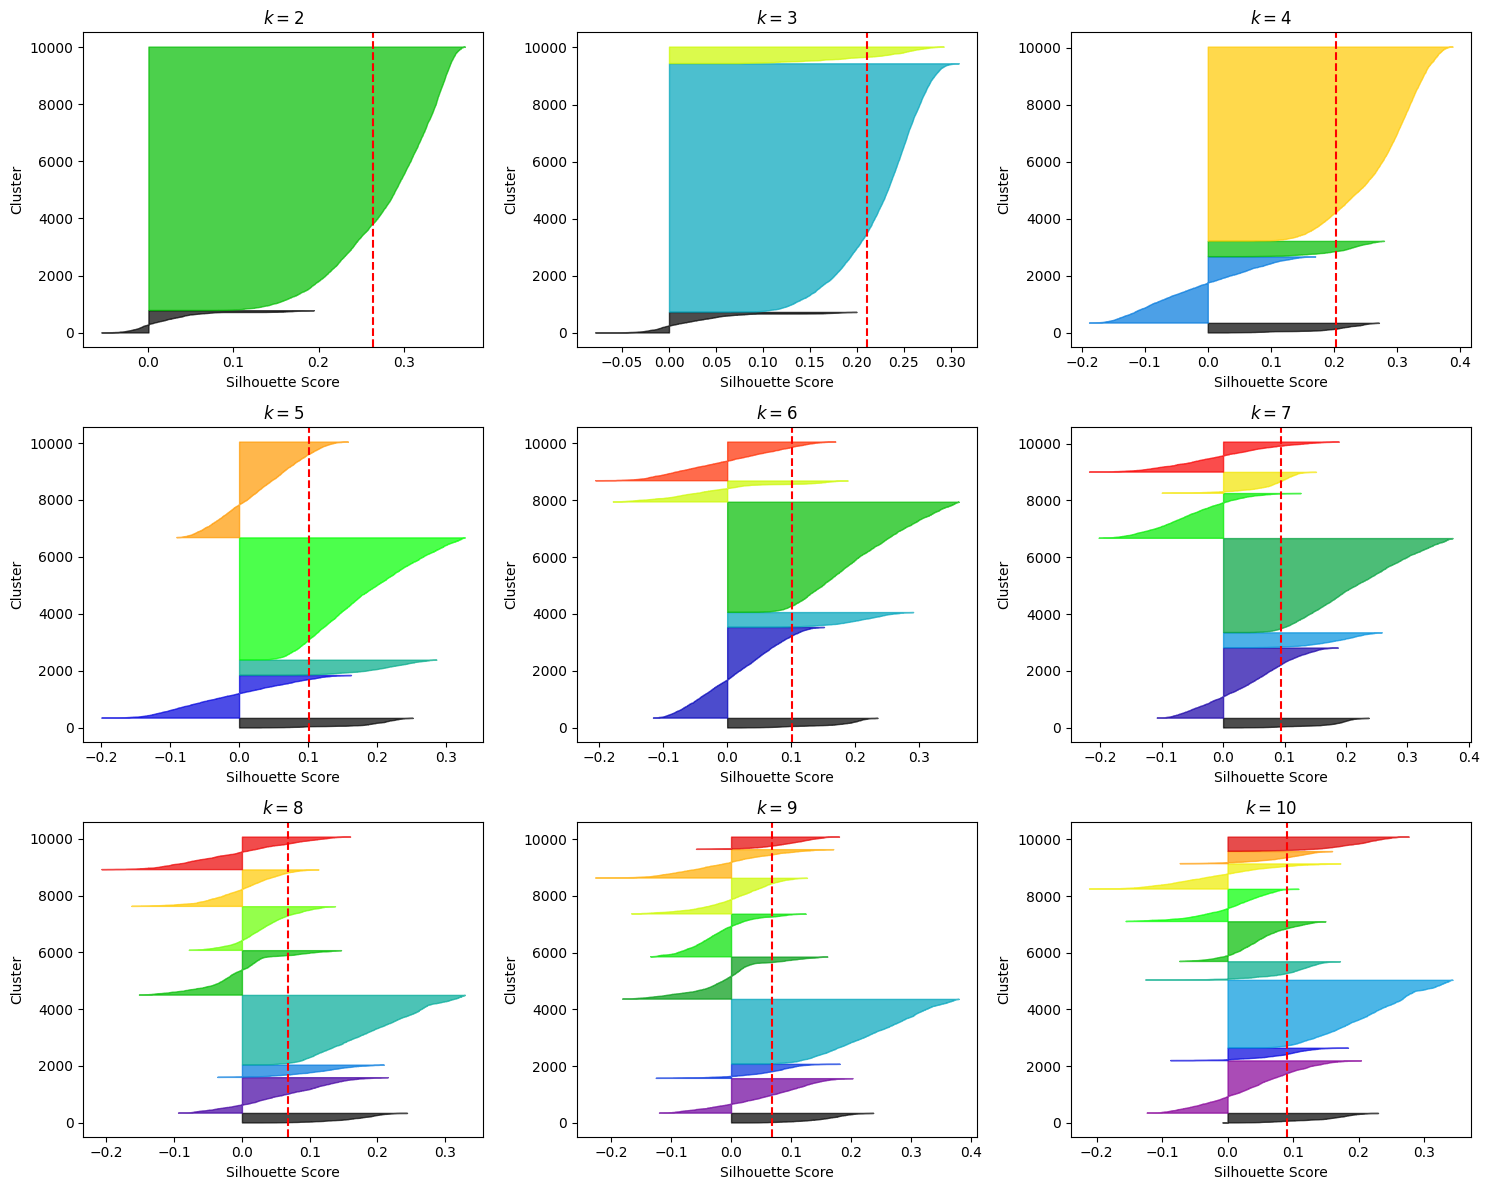

In [40]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Usar una muestra más pequeña para acelerar el cálculo
X_sample = resample(X_scaled, n_samples=10000, random_state=42)

k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
axs = axs.flatten()

for idx, k in enumerate(k_values):
    ax = axs[idx]
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X_sample)

    silhouette_vals = silhouette_samples(X_sample, cluster_labels)
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    avg_score = np.mean(silhouette_vals)
    ax.axvline(x=avg_score, color="red", linestyle="--")
    ax.set_title(f"$k={k}$")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Cluster")

    # Imprimir scores promedio
    print(f"\n=== K={k} ===")
    # Score promedio por cada cluster individual
    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_avg = np.mean(cluster_silhouette_vals)
        cluster_size = len(cluster_silhouette_vals)
        print(f"Cluster {i}: Score={cluster_avg:.3f}")
    print(f"Silhouette Score Promedio General: {avg_score:.3f}")
plt.tight_layout()
plt.show()


semi-supervisado

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [44]:

# Dividir datos (SIN usar la columna de diabetes del dataset)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Aplicar clustering en datos de entrenamiento
kmeans_semi = KMeans(n_clusters=k_optimo, random_state=42)
cluster_labels_train = kmeans_semi.fit_predict(X_train)
distances = kmeans_semi.transform(X_train)

# Seleccionar muestras más representativas (una por cluster)
representative_idxs = np.argmin(distances, axis=0)
X_representative = X_train[representative_idxs]
y_representative = cluster_labels_train[representative_idxs]  # Etiquetas del clustering

print(f"Muestras representativas seleccionadas: {k_optimo}")
print(f"Etiquetas de cluster de muestras representativas: {y_representative}")

# Predecir clusters para datos de prueba
cluster_labels_test = kmeans_semi.predict(X_test)

# Entrenar modelo semi-supervisado
model_semi = LogisticRegression(random_state=42, max_iter=1000)
model_semi.fit(X_representative, y_representative)
y_pred_semi = model_semi.predict(X_test)
accuracy_semi = accuracy_score(cluster_labels_test, y_pred_semi)


# Resultados
print(f"\nPrecisión Semi-supervisado: {accuracy_semi:.4f}")

print(f"\nEl modelo semi-supervisado usa solo {k_optimo} muestras representativas")
print(f"vs {k_optimo} muestras aleatorias del modelo tradicional")

Muestras representativas seleccionadas: 3
Etiquetas de cluster de muestras representativas: [0 1 2]

Precisión Semi-supervisado: 0.8345

El modelo semi-supervisado usa solo 3 muestras representativas
vs 3 muestras aleatorias del modelo tradicional


activo

In [47]:

# Usar el modelo semi-supervisado para encontrar muestras con menor confianza
probas = model_semi.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)

print(f"Confianzas más bajas (primeras 10): {labels[sorted_ixs[:10]].round(3)}")

# Seleccionar las k muestras con menor confianza
X_lowest = X_train[sorted_ixs[:k_optimo]]
y_lowest = cluster_labels_train[sorted_ixs[:k_optimo]]  # Etiquetas "verdaderas" de esas muestras

print(f"Etiquetas de las {k_optimo} muestras con menor confianza: {y_lowest}")

# Crear conjunto de entrenamiento mejorado
# Comenzar con las etiquetas del clustering para las primeras 1000 muestras
y_train_improved = cluster_labels_train[:1000].copy()
# "Etiquetar" manualmente las muestras de menor confianza
y_train_improved[sorted_ixs[:k_optimo]] = y_lowest

# Entrenar modelo con aprendizaje activo
model_active = LogisticRegression(random_state=42, max_iter=1000)
model_active.fit(X_train[:1000], y_train_improved)
y_pred_active = model_active.predict(X_test)
accuracy_active = accuracy_score(cluster_labels_test, y_pred_active)

print(f"\nPrecisión con Aprendizaje Activo: {accuracy_active:.4f}")

print(f"\nResumen:")
print(f"• Semi-supervisado: {accuracy_semi:.4f}")
print(f"• Aprendizaje Activo: {accuracy_active:.4f}")

Confianzas más bajas (primeras 10): [0.338 0.356 0.36  0.363 0.364 0.365 0.367 0.368 0.371 0.373]
Etiquetas de las 3 muestras con menor confianza: [1 1 1]

Precisión con Aprendizaje Activo: 0.9837

Resumen:
• Semi-supervisado: 0.8345
• Aprendizaje Activo: 0.9837
